In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
# validate the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# check is there any duplicate exist
df.duplicated().sum()

0

In [6]:
# how many of customers has left the bank and how many are active
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
# How many countries exist
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
# verifying gender balance
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
# drop unnecessary columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace= True)

In [10]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [11]:
# Covert in one hot encoded data
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [12]:
df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
5,645,44,8,113755.78,2,1,0,149756.71,1,False,True,True
6,822,50,7,0.00,2,1,1,10062.80,0,False,False,True
7,376,29,4,115046.74,4,1,0,119346.88,1,True,False,False
8,501,44,4,142051.07,2,0,1,74940.50,0,False,False,True
9,684,27,2,134603.88,1,1,1,71725.73,0,False,False,True


In [13]:
# Drop temporarily exited column to get other columns and store them into x 
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 1)

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [15]:
y.head(10)

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

In [16]:
X_train.shape

(8000, 11)

In [17]:
# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [19]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [21]:
model = Sequential()
input_layer = Input(shape=(11,))
model.add(input_layer)
# model.add(Dense(3, activation='sigmoid')) # input layer
# model.add(Dense(1, activation='sigmoid')) #Ouput Layer

# Improving Model Accuracy

In [22]:
model.add(Dense(11, activation='relu')) #input layer
model.add(Dense(11, activation='relu')) #input layer
model.add(Dense(11, activation='relu')) #input layer

model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408 (1.59 KB)

 Trainable params: 408 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Now we have to compile our model so on this stage you have to tell your model
# which loss function you will use and which optimizer you will used ...etc.

# Since our problem is binary classification problem so we will use binary_crossentropy (also called log loss)
# as loss function

# model.compile(loss='binary_crossentropy', optimizer='Adam')


In [25]:
# This time we will check accuracy on run time and we will also split data in 60-20% for validation
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [26]:
# fit our model now
# model.fit(X_train, y_train, epochs=10)
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2)

Epoch 1/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7619 - loss: 4348.3320 - val_accuracy: 0.7031 - val_loss: 46.9729
Epoch 2/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6803 - loss: 48.3325 - val_accuracy: 0.7556 - val_loss: 25.9396
Epoch 3/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6918 - loss: 25.0751 - val_accuracy: 0.7975 - val_loss: 67.1372
Epoch 4/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6863 - loss: 26.3048 - val_accuracy: 0.7487 - val_loss: 6.5611
Epoch 5/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - loss: 22.1194 - val_accuracy: 0.7937 - val_loss: 13.7449
Epoch 6/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6752 - loss: 21.2941 - val_accuracy: 0.4863 - val_loss: 36.8346
Epoch 7/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6911 - loss: 29.7684 - val_accuracy: 0.7975 - val_loss: 25.6463
Epoch 8/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6725 - loss: 25

In [27]:
# Now we have to get weights and Bias values
model.layers[1].get_weights()

[array([[ 0.39398885, -0.3713529 , -0.01792408, -0.3447119 , -0.39400342,
          0.37395468,  0.07764018, -0.46478662, -0.43027806, -0.06820175,
         -0.09887732],
        [-0.52214503,  0.12796791,  0.28993177,  0.0512526 ,  0.02786397,
          0.1655823 ,  0.04625005, -0.03253106, -0.4829965 , -0.21849543,
          0.30689898],
        [-0.44145656, -0.24048066, -0.20421046, -0.26359016, -0.19992492,
          0.31389588,  0.3108601 , -0.25045246, -0.3917143 , -0.535679  ,
          0.18828037],
        [-0.22583258,  0.48988286, -0.01458316, -0.15046111, -0.26535565,
         -0.74080795,  0.04426469,  0.12429948,  0.40154704,  0.4126617 ,
          0.14703885],
        [-0.20892012, -0.05370202,  0.27945542, -0.4084281 , -0.33115235,
         -0.30434206, -0.32813948,  0.11156041, -0.3391437 , -0.41623482,
         -0.1065385 ],
        [-0.0060248 ,  0.19133255, -0.20148285,  0.5605831 ,  0.30235502,
          0.54119045,  0.40383777, -0.09040473,  0.64864546,  0.2145861

In [28]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
y_pred = np.where(y_log>0.5, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [30]:
# Checking the accuracy of model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7825

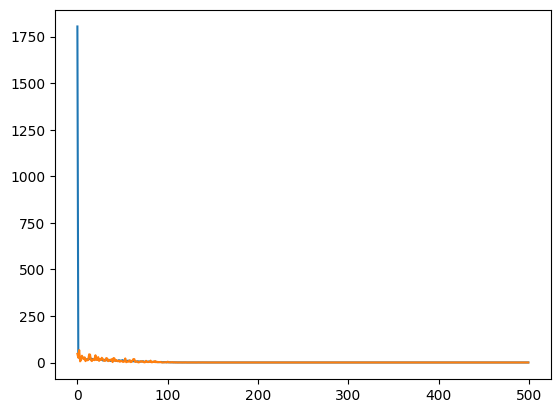

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])